## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [5]:
df.shape

(1893, 8)

In [6]:
df.rename({"Mouse ID": "Mouse_ID"}, axis=1, inplace=True)
df.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
df.Mouse_ID.nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df.groupby(["Mouse_ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse_ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df.Mouse_ID == "g989"
df.loc[mask]

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mask = df.Mouse_ID != "g989"
df_sub = df.loc[mask].reset_index(drop=True)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse_ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
df_sub.Mouse_ID.nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avgs = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
meds = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varss = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df_sub.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summ1 = pd.concat([avgs, meds, varss, stds, sems], axis=1)
summ1.columns = ["Mean", "Median", "Var", "Std", "SEM"]
summ1

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summ2 = df_sub.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summ2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



In [15]:
df_sub.groupby("Drug Regimen").size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [16]:
summ2 = df_sub["Drug Regimen"].value_counts().reset_index()
summ2.columns = ["Drug", "Count"]
summ2

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


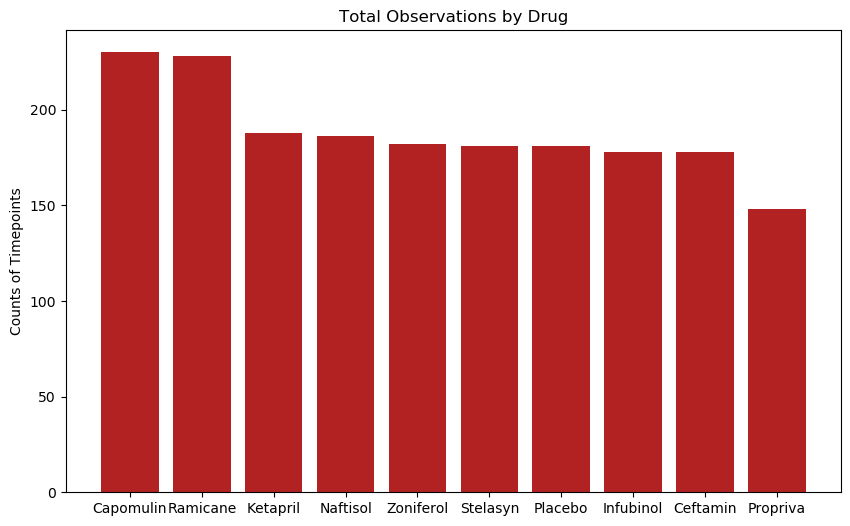

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(summ2.Drug, summ2.Count,color="firebrick")
plt.title("Total Observations by Drug")
plt.ylabel("Counts of Timepoints")
plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [19]:
summ3 = df_sub["Sex"].value_counts().reset_index()
summ3.columns = ["Gender", "Count"]
summ3

,Gender,Count
0,Male,958
1,Female,922


In [20]:
pies = summ3.Gender
pie_votes = summ3["Count"]
colors = ["lightskyblue","pink"]
explode = (0.1,0)

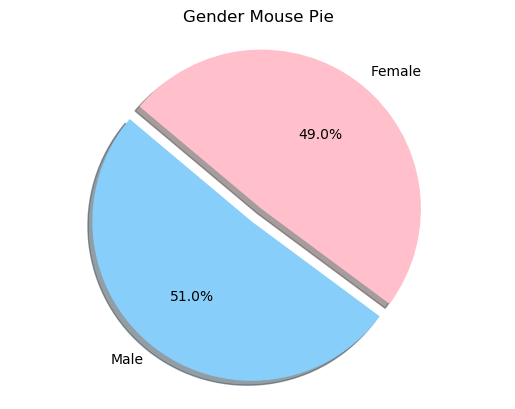

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Gender Mouse Pie")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [22]:
df_sub.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
times = df_sub.groupby("Mouse_ID").Timepoint.max().reset_index()
times

,Mouse_ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [26]:
df_sub3 = pd.merge(df_sub, times, on=["Mouse_ID", "Timepoint"], how="inner")
df_sub3

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [33]:
mask = df_sub3["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df_sub4 = df_sub3.loc[mask].reset_index(drop=True)

df_sub4

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


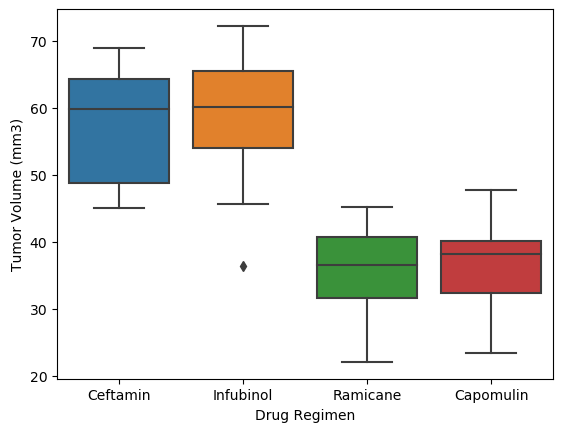

In [42]:
sn.boxplot(data=df_sub4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


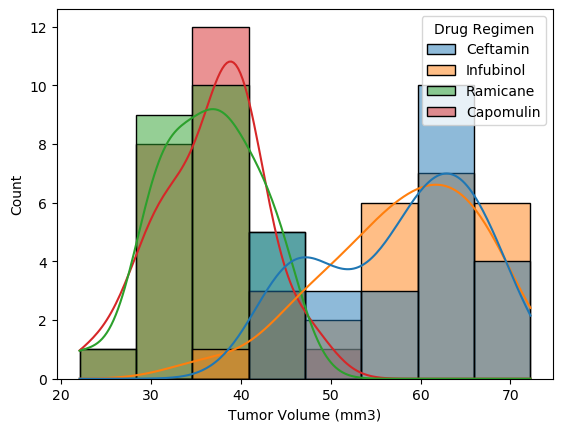

In [58]:
sn.histplot(data=df_sub4, hue="Drug Regimen", x="Tumor Volume (mm3)", kde=True)
plt.show()

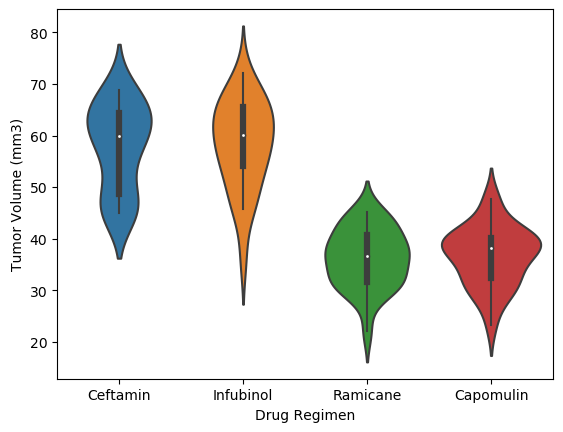

In [59]:
sn.violinplot(data=df_sub4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()

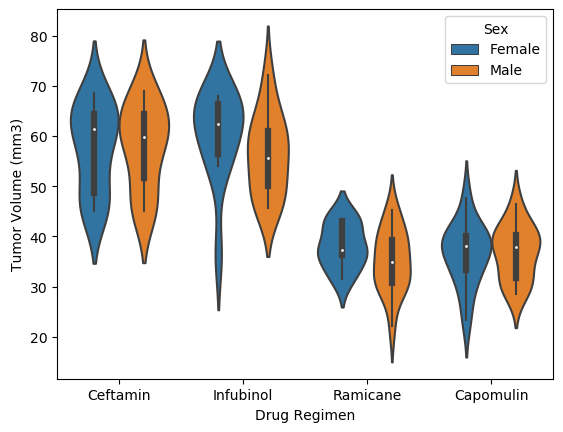

In [61]:
sn.violinplot(data=df_sub4, x="Drug Regimen", y="Tumor Volume (mm3)", hue="Sex")
plt.show()

In [40]:
df_sub4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse_ID            100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
 3   Metastatic Sites    100 non-null    int64  
 4   Drug Regimen        100 non-null    object 
 5   Sex                 100 non-null    object 
 6   Age_months          100 non-null    int64  
 7   Weight (g)          100 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.4+ KB


In [49]:
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = []

for drug in drugs:
    sub = df_sub4.loc[df_sub4["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (df_sub4["Drug Regimen"] == drug) & ((df_sub4["Tumor Volume (mm3)"] > upper_bound) | (df_sub4["Tumor Volume (mm3)"] < lower_bound))
    outliers = df_sub4.loc[mask]
    print(outliers)
    
    data.append(sub)

Empty DataFrame
Columns: [Mouse_ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse_ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
  Mouse_ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
4     c326          5           36.321346                 0    Infubinol   

      Sex  Age_months  Weight (g)  
4  Female          18          25  
Empty DataFrame
Columns: [Mouse_ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


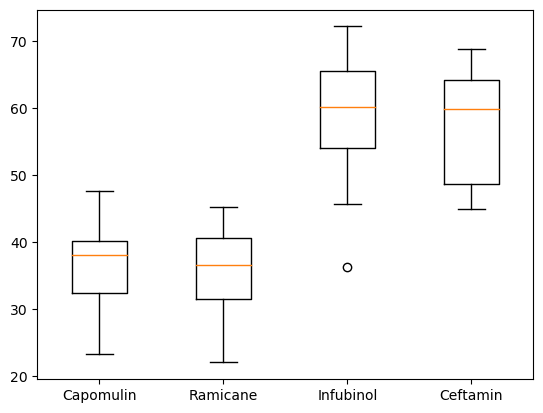

In [46]:
plt.boxplot(data, labels=drugs)
plt.show()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mask = df_sub["Drug Regimen"] == "Capomulin"

data = df_sub.loc[mask].groupby("Mouse_ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()
data

,Mouse_ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22.0
1,b742,40.083699,21.0
2,f966,36.505973,17.0
3,g288,41.990097,19.0
4,g316,44.613344,22.0
5,i557,44.805810,24.0
6,i738,39.141053,20.0
7,j119,44.465236,23.0
8,j246,43.216925,21.0
9,l509,44.434474,21.0


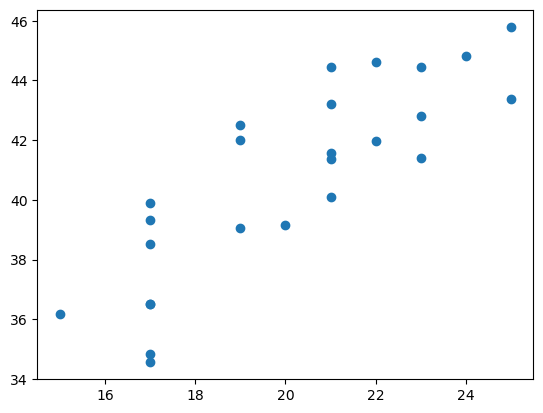

In [56]:
plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
